# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [268]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

"""
# did this differently mostly because we need pyplot more than the whole package
# and because it was throwing errors
# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics
"""

# Module for plotting
import matplotlib.pyplot as plt
#print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
#       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics


# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [299]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv.bz2')

# and this for later...
weather_df= pd.read_csv('weather.csv.bz2')

In [300]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [301]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [302]:
# let's first confirm that all of the entries are from 2013
whichyear = flights_df['year'].unique()
print(whichyear)

# then let's check the different airport codes to ensure all origins are NY airports
whatairports = flights_df['origin'].unique()
print(whatairports)

# great! now let's choose SEA as the destination
# since true==1 and false==0, we can sum the True values and get our answer
print(sum(flights_df['dest'] == 'SEA'))

# but it is possible to be more granular, depending on how we define flights.
# do we mean flights as journeys from NYC -> SEA or unique flight paths?
# further, do we mean unique airplanes flying unique flight paths?
# i am going to go with the easier answer to the question
# which is line-item entries in the dataframe with a destination SEA

[2013]
['EWR' 'LGA' 'JFK']
3923


There were 3923 flights from NYC airports (i.e. EWR, LGA, & JFK) to SEA.

(b) How many airlines fly from NYC to Seattle?

In [303]:
# this line retrieves the count of how many unique airlines fly to SEA
# dropping len() states which airlines they are
nycsea = flights_df.carrier[flights_df['dest'] == 'SEA'].unique()
print(len(nycsea),"airlines:", nycsea)

5 airlines: ['AS' 'DL' 'UA' 'B6' 'AA']


There are 5 airlines, which I believe are Alaska, Delta, United, American and JetBlue.

(c) How many unique air planes fly from NYC to Seattle?

In [304]:
# this line retrieves the count of how many unique airplanes
# (defined as tail number identifiers) fly to SEA
# dropping len() states which tailnumbers they are
tailnum = flights_df.tailnum[flights_df['dest'] == 'SEA'].unique()

# i heard from other students that there may be NA values, so here's a test to check
na_values = flights_df.tailnum[flights_df['dest'] == 'SEA'].isnull().values.any().sum()

len(tailnum)-na_values

935

There are 936 entries for unique air planes that fly from NYC to Seattle, and 935 with identifiers. It is possible that the plane with the unidentified tail number is a duplicate, but it is equally possible that it is not. I guess there are two answers for this question! :)

(d) What is the average arrival delay for flights from NC to Seattle?

In [305]:
# the typo in the question above scared me! i was thinking we had to figure out
# flights from North Carolina for a second, which is clearly not in the dataset!!
#
arrdelay = flights_df.arr_delay[flights_df['dest'] == 'SEA'].mean()
print(arrdelay,"min")

-1.0990990990990992 min


The average arrival delay appears to be -1.09min, or -65sec, which means planes are showing up a little early!

(e) What proportion of flights to Seattle come from each NYC airport?

In [306]:
# let's subset first and then do some math
sea = flights_df[flights_df.dest == 'SEA']
ewr = sea[flights_df.origin == 'EWR']
lga = sea[flights_df.origin == 'LGA']
jfk = sea[flights_df.origin == 'JFK']

ewr_sea_proportion = len(ewr)/len(sea)
lga_sea_proportion = len(lga)/len(sea)
jfk_sea_proportion = len(jfk)/len(sea)

print("EWR:", ewr_sea_proportion,
      "\nJFK:", jfk_sea_proportion,
      "\nLGA:", lga_sea_proportion,)

EWR: 0.46673464185572267 
JFK: 0.5332653581442773 
LGA: 0.0


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


~47% of flights to SEA come from EWR, and ~53% of flights to SEA come from JFK. None come from LGA.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [307]:
# step 1: convert 3 cols to datetime object
flights_df["date"] = pd.to_datetime(flights_df.year*10000+flights_df.month*100+flights_df.day,
               format='%Y%m%d')

# step 2: groupby all of the dates that are the same,
# then aggregate by sum and mean

maxdelay = flights_df.groupby(flights_df.date).agg(['sum','mean'])

# step 3: get the location of the 

arrival = maxdelay.arr_delay.loc[maxdelay['dep_delay'].idxmax()]
departure = maxdelay.dep_delay.loc[maxdelay['arr_delay'].idxmax()]
print(arrival['mean'])
print(departure['mean'])

date
2013-03-08    85.862155
2013-03-08    85.862155
Name: mean, dtype: float64
date
2013-03-08    83.536921
2013-03-08    83.536921
Name: mean, dtype: float64


It appears the date with the largest average departure delay is 03/08/2013.
It appears the date with the largest average arrival delay is also 03/08/2013.
The weather must have been reallllllly bad then or something.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [308]:
# we're interpreting A and B to mean two separate things
# so first let's check if there are any NANs or NAs in the newly
# generated flights_df.date field
flights_df.date.isnull().values.any().sum()

# ok great; that results the right way
# so let's assume that day refers to "day of the week" and not date
# the way we approach this is by creating a new column that takes
# the values from the datetime column, reformats them as weekdays
# and then aggregates them using mean
flights_df['weekday'] = flights_df['date'].apply(lambda x: x.weekday())

weekday = flights_df.pivot_table('dep_delay', index='weekday', aggfunc = 'mean')
weekdays = ['Sunday', 'Monday', 'Tuesday',
                'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday.index = weekdays
print(weekday.idxmax(),"\n",weekday.max())

dep_delay    Wednesday
dtype: object 
 dep_delay    16.14892
dtype: float64


Because of ambiguity in the wording of the question, you could interpret 2B to result in the same answer as 2A (i.e. which date/day is the worst for delays). But we should give more credence to the question, and entertain another way of looking at it. Let's assume day refers to 'day of the week' and not 'date'. If that's the case, it looks like Wednesdays are pretty bad days to fly out, with an average delay of 16min. I don't know about you, but I book my flights for Mondays or Fridays, and no other time. :P

(c) Are there any seasonal patterns in departure delays for flights from NYC?

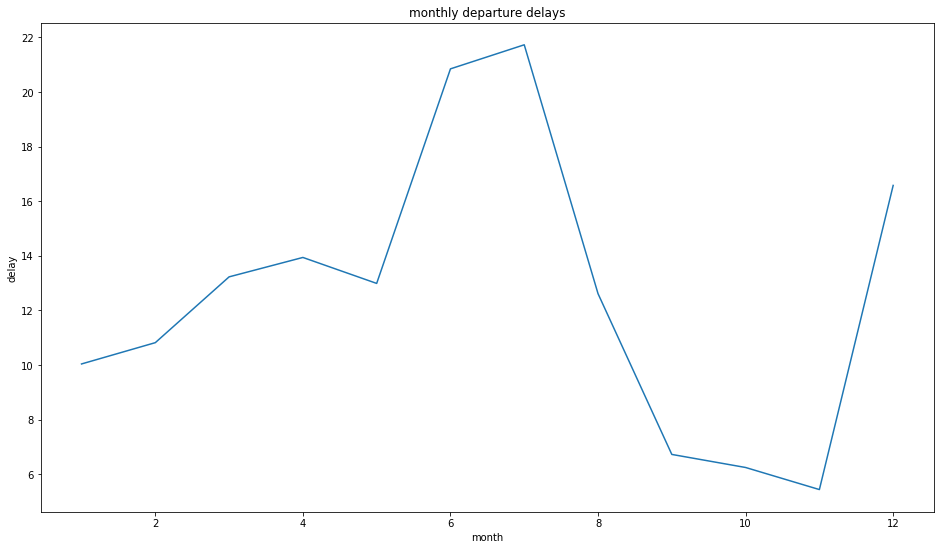

In [309]:
# we can find this out by aggregating the data by month and then plotting
timeseries_mo = flights_df.groupby("month").agg(['sum','mean'])

# but first, a helper function that i will use throughout
# the rest of the assignment
def plotFunction(arg, xlabel, ylabel, title, ylim=False, save=False):
    plt.figure(figsize=(16,9))
    plt.plot(arg)
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel))
    plt.title(str(title))
    if ylim == True:
        # hardcoding this for a future plot
        plt.ylim([0, 150])
    if save == True:
        plt.savefig(title+".png")
    plt.show()

plotFunction(timeseries_mo.dep_delay['mean'], "month", "delay", "monthly departure delays")

There definitely appears to be some seasonality to the departure delays. They are worst in the summer, peaking around August, and then reach an all-time low in November before bouncing back up significantly in December. I would guess that airports operate the most efficiently during low air-traffic seasons (i.e. Thanksgiving, springtime) and are horrible during times when a lot of people travel (i.e. summer holiday, Christmas).

(d) On average, how do departure delays vary over the course of a day?

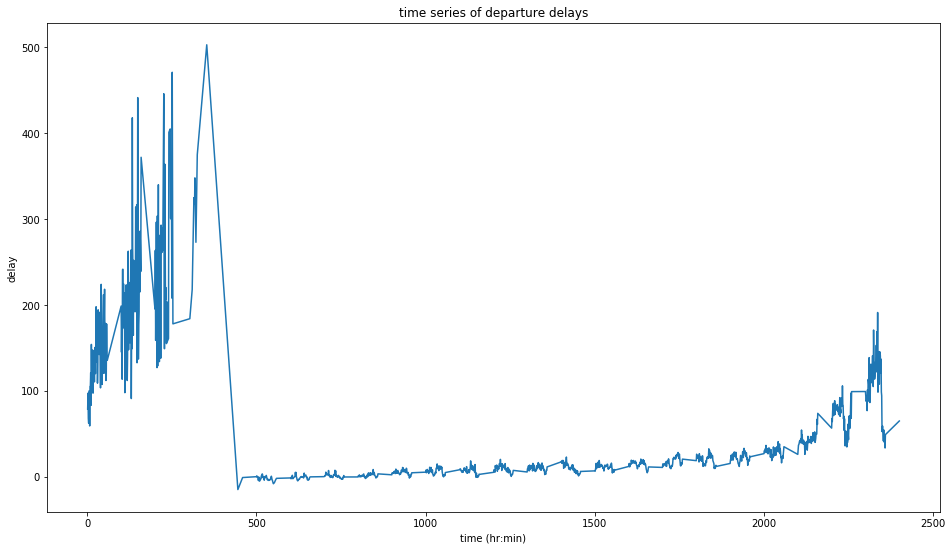

In [310]:
# similar to the previous question, we can find this by
timeseries_hr = flights_df.groupby("dep_time").agg(['mean'])

#aggregating the data by time and then plotting
plotFunction(timeseries_hr.dep_delay["mean"],\
             "time (hr:min)", "delay", "time series of departure delays")

This is a pretty granular plot, but it seems that there is a great degree of variance in the early morning hours (i.e. from midnight to 4am). Then delays level off, until they start increasing again around 8pm and going through til 11pm.

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [311]:
# Speed = Distance over air time / 60 to convert to mph

flights_df['speed'] = flights_df.distance / (flights_df.air_time / 60)
fastest = flights_df.loc[flights_df['speed'].idxmax()]

# I realized that you could do the following
# after I did it by index: flights_df.sort(['speed'], ascending = False).head()

print(fastest.carrier, fastest.flight, "from", fastest.origin, "to", fastest.dest,
     "on", str(fastest.month)+"/"+str(fastest.day), "was the fastest flight")

DL 1499 from LGA to ATL on 5/25 was the fastest flight


As it says above, DL1499 from LGA to ATL on May 25 was the fastest flight.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [317]:
# this line groups all flights by carrier, flight, and destination
# and then tallies them up
daily = flights_df.groupby(['carrier','flight','dest']).count()

# i figured out that if they equal 365 that means they fly every day
# i am sure there is a more graceful or pythonic way of doing this
# but i couldn't figure it out :/
daily[daily.day == 365]

Unnamed: 0  year  month  day  dep_time  dep_delay  \
carrier flight dest                                                      
AA      59     SFO          365   365    365  365       359        359   
        119    LAX          365   365    365  365       361        361   
        181    LAX          365   365    365  365       363        363   
        1357   SJU          365   365    365  365       364        364   
        1611   MIA          365   365    365  365       360        360   
B6      219    CLT          365   365    365  365       363        363   
        359    BUR          365   365    365  365       364        364   
        371    FLL          365   365    365  365       359        359   
        431    SRQ          365   365    365  365       362        362   
        703    SJU          365   365    365  365       364        364   
        1783   MCO          365   365    365  365       365        365   
DL      2159   MCO          365   365    365  365       364        364   
        2391   TPA          365   365    365  365       360        360   
EV      5712   IAD          365   365    365  365       351        351   
UA      15     HNL          365   365    365  365       363        363   
VX      251    LAS          365   365    365  365       364        364   
        407    LAX          365   365    365  365       364        364   
        413    LAX          365   365    365  365       362        362   

                     arr_time  arr_delay  tailnum  origin  air_time  distance  \
carrier flight dest                                                             
AA      59     SFO        359        359      363     365       359       365   
        119    LAX        361        359      364     365       359       365   
        181    LAX        363        362      365     365       362       365   
        1357   SJU        364        363      364     365       363       365   
        1611   MIA        360        360      364     365       360       365   
B6      219    CLT        363        363      365     365       363       365   
        359    BUR        364        364      365     365       364       365   
        371    FLL        359        359      365     365       359       365   
        431    SRQ        362        361      365     365       361       365   
        703    SJU        364        364      365     365       364       365   
        1783   MCO        365        365      365     365       365       365   
DL      2159   MCO        364        364      365     365       364       365   
        2391   TPA        360        359      365     365       359       365   
EV      5712   IAD        351        351      365     365       351       365   
UA      15     HNL        363        359      363     365       359       365   
VX      251    LAS        364        364      365     365       364       365   
        407    LAX        363        363      365     365       363       365   
        413    LAX        362        360      365     365       360       365   

                     hour  minute  date  weekday  speed  
carrier flight dest                                      
AA      59     SFO    359     359   365      365    359  
        119    LAX    361     361   365      365    359  
        181    LAX    363     363   365      365    362  
        1357   SJU    364     364   365      365    363  
        1611   MIA    360     360   365      365    360  
B6      219    CLT    363     363   365      365    363  
        359    BUR    364     364   365      365    364  
        371    FLL    359     359   365      365    359  
        431    SRQ    362     362   365      365    361  
        703    SJU    364     364   365      365    364  
        1783   MCO    365     365   365      365    365  
DL      2159   MCO    364     364   365      365    364  
        2391   TPA    360     360   365      365    359  
EV      5712   IAD    351     351   365      365 

The American Airlines flights 59 (SFO), 119 (LAX), 181 (also LAX), 1357 (SJU), and 1611 (MIA) operate daily.
The JetBlue flights 219 (CLT), 359 (BUR), 371 (FLL), 431 (SRQ), 703 (SJU), and 1783 (MCO) operate daily.
The Delta flights 2159 (MCO) and 2391 (TPA) operate daily.
The EVA airline flight 5712 (IAD) operates daily.
The United Airlines flight 15 (HNL) operates daily.
The Virgin America flights 251 (LAS), 407 (LAX), and 413 (LAX) operate daily.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


If an airport is that large, one would assume that they have good enough process management that they can reduce delays. However, that is often not the case and if you fly out of a hub, you're often delayed (at least from my n=1 dataset :P). Thus my research question: *should we expect flights destined from New York to one of the three top hubs to have shorter or longer departure delays relative to non-hub airports?* Further, is there seasonality to this?

Large hub airports are defined as those that service ~1% of US air travel by themselves.
(See wikipedia: https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States)

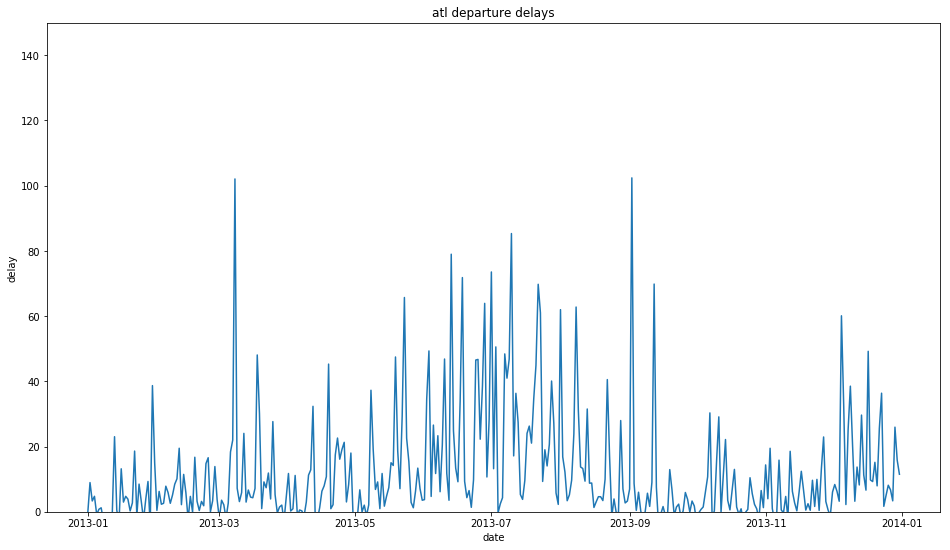

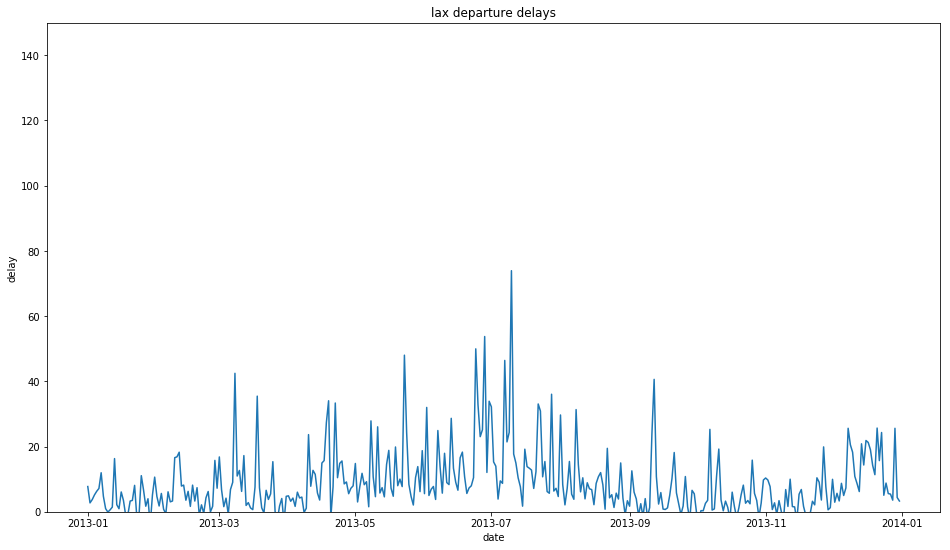

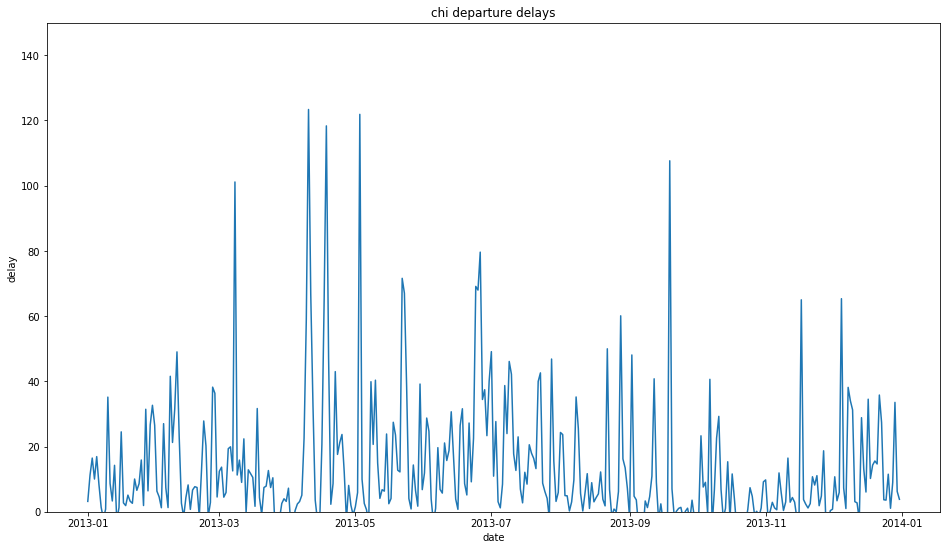

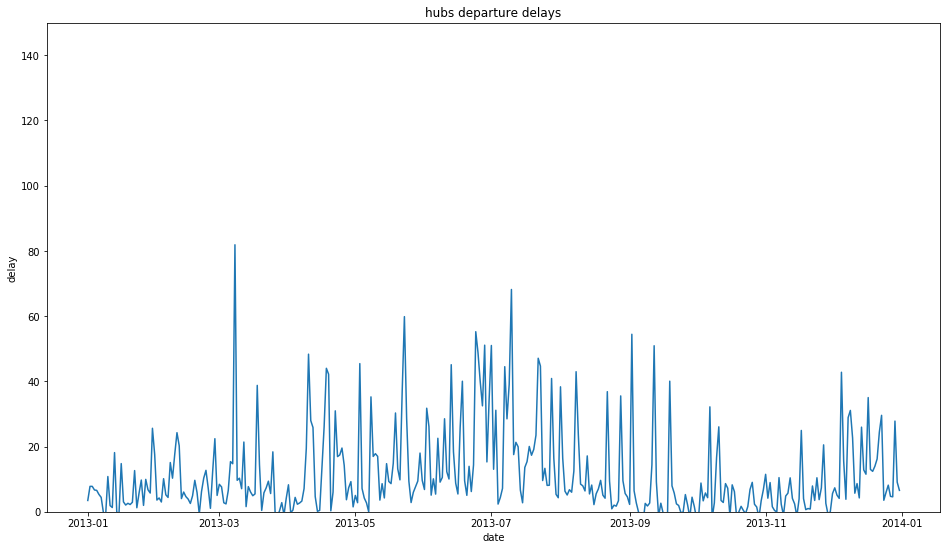

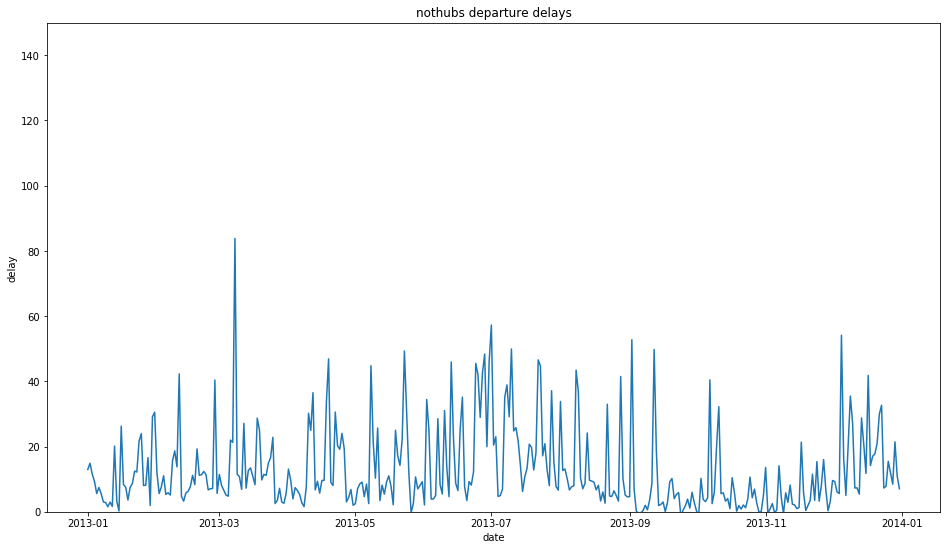

In [313]:
# let's first collect a list of hubs from that wikipedia article, leaving out JFK
hub_list = ['ATL', 'LAX', 'ORD']

atl = flights_df.loc[flights_df['dest'] == 'ATL'].groupby("date").agg(['mean'])
lax = flights_df.loc[flights_df['dest'] == 'LAX'].groupby("date").agg(['mean'])
chi = flights_df.loc[flights_df['dest'] == 'ORD'].groupby("date").agg(['mean'])
hubs = flights_df.loc[flights_df['dest'].isin(hub_list)].groupby("date").agg(['mean'])
nothubs = flights_df.loc[~flights_df['dest'].isin(hub_list)].groupby("date").agg(['mean'])

# first let's confirm that each of these airports in question is in fact a hub
varlist = [atl, lax, chi, hubs, nothubs]
pct = [ len(i)/len(flights_df) for i in varlist ]

# of yearly air traffic, atl serves 5%, lax serves 5% and chi serves 5%
# that's more than enough to qualify

# plot the departure delays for the three airports of note against the nonhubs
plotFunction(atl.dep_delay, "date", "delay", "atl departure delays", ylim=True)
plotFunction(lax.dep_delay, "date", "delay", "lax departure delays", ylim=True)
plotFunction(chi.dep_delay, "date", "delay", "chi departure delays", ylim=True)
plotFunction(hubs.dep_delay, "date", "delay", "hubs departure delays", ylim=True)
plotFunction(nothubs.dep_delay, "date", "delay", "nothubs departure delays", ylim=True)

First, after selecting the five data categories (the three hubs, the aggregation of the hubs, and the non-hubs), we aggregate them by month. Then we plot and compare! Based on the charts produced, it seems that--of the three individual hubs--CHI has the most dramatic outliers with respect to departure delays. ATL is a close second, followed by LAX (which is suprisingly okay). I would consider CHI, then ATL, then LAX to be the most consistently bad.

The non-hub airports in aggregate have similar patterns to LAX overall, which suggests LAX operates the most efficiently of the three. Finally, it seems that--barring some dramatic outliers, the hubs operate slightly more efficiently than all of the other airports in aggregate (except in the summer months). They have a lower baseline when it comes to delays overall

There isn't a strong visible element of seasonality to this outside of what has already been described (i.e. worse in the summer and in the winter)

Perhaps all of the observations we notice are becasue we're comparing ~15% of the data to ~85% of the data. We could examine this further by normalizing, performing linear regression, or using a time-series classifier but I think that's out of scope for this assignment.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [314]:
# let's use that weather data from the beginning
# step 0: convert 3 columns (year month day) to datetime object
weather_df["date"] = pd.to_datetime(weather_df.year*10000+weather_df.month*100+\
                                    weather_df.day, format='%Y%m%d')

# then let's merge the two dataframes
flight_weather = pd.merge(flights_df, weather_df, on='date')

# then, to make this less dramatic
# in terms of memory management, let's create a series
# of pivot tables using a helper function

def pivotTable(data, values, index):
    return pd.pivot_table(data = data, values = values, aggfunc = 'mean', index=index)

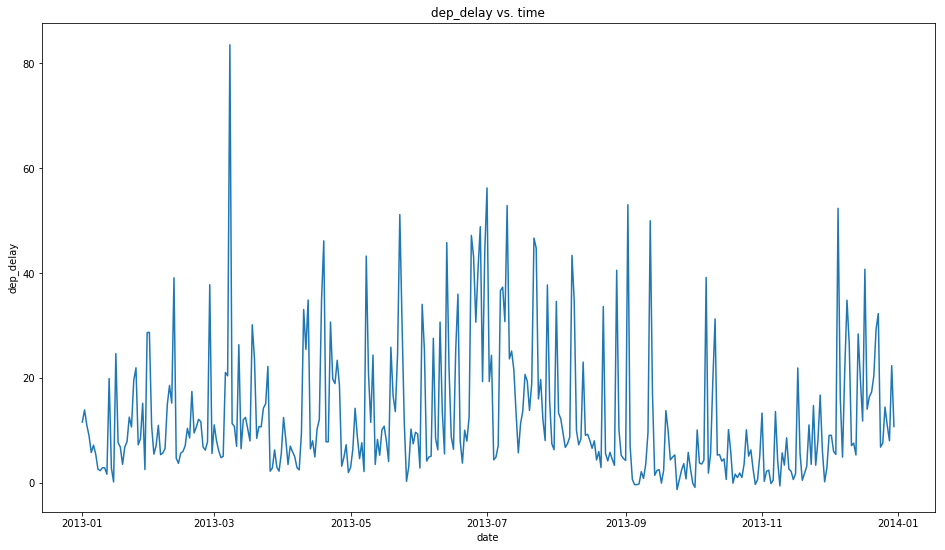

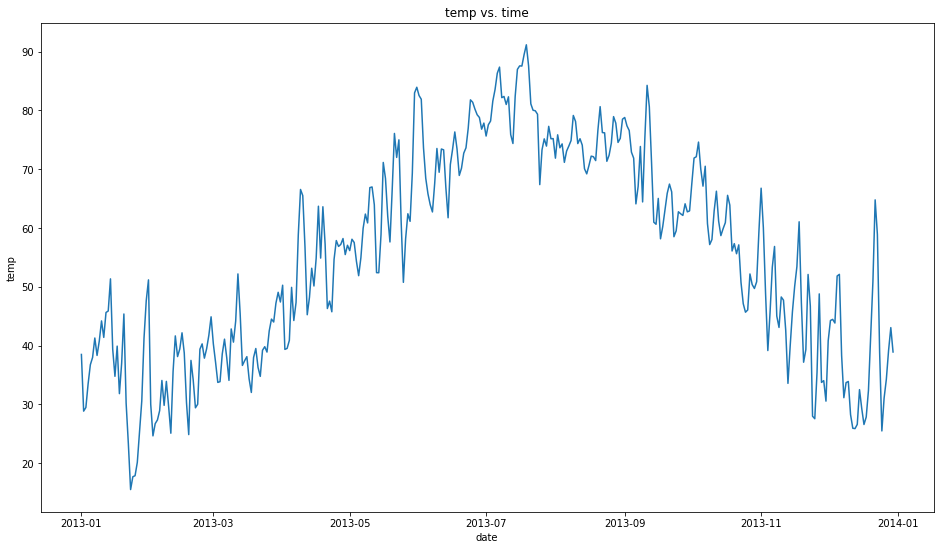

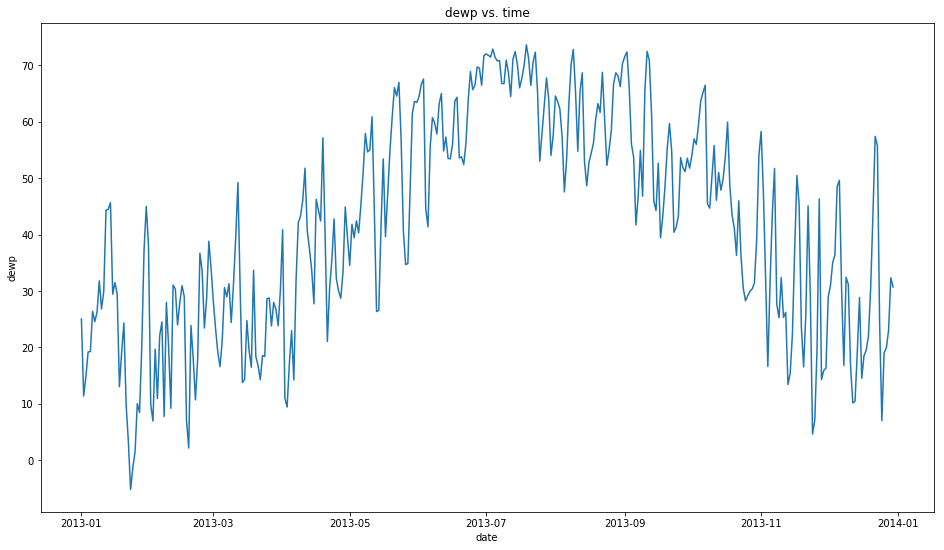

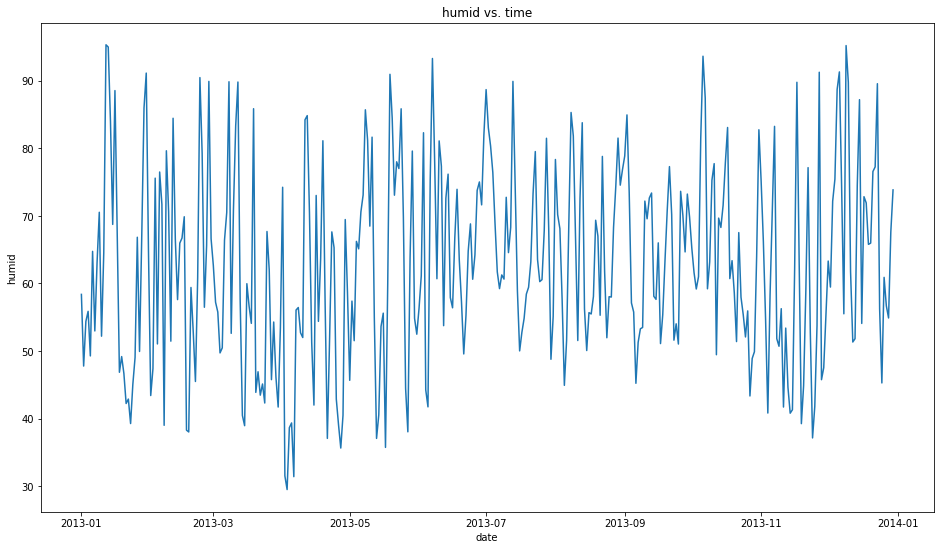

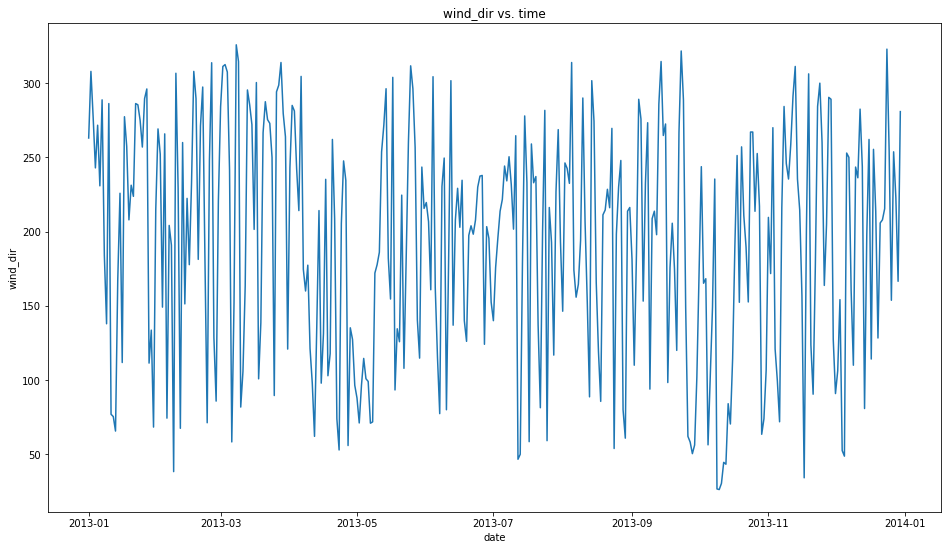

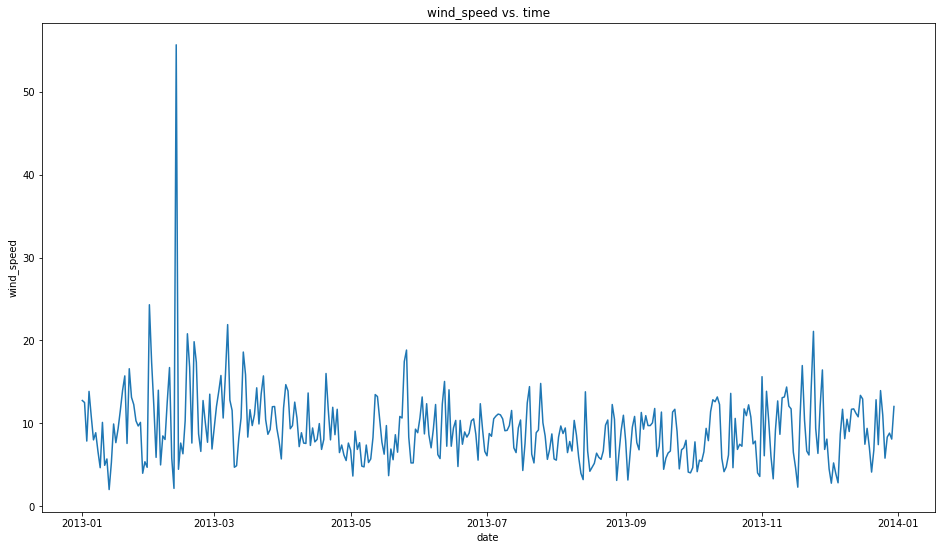

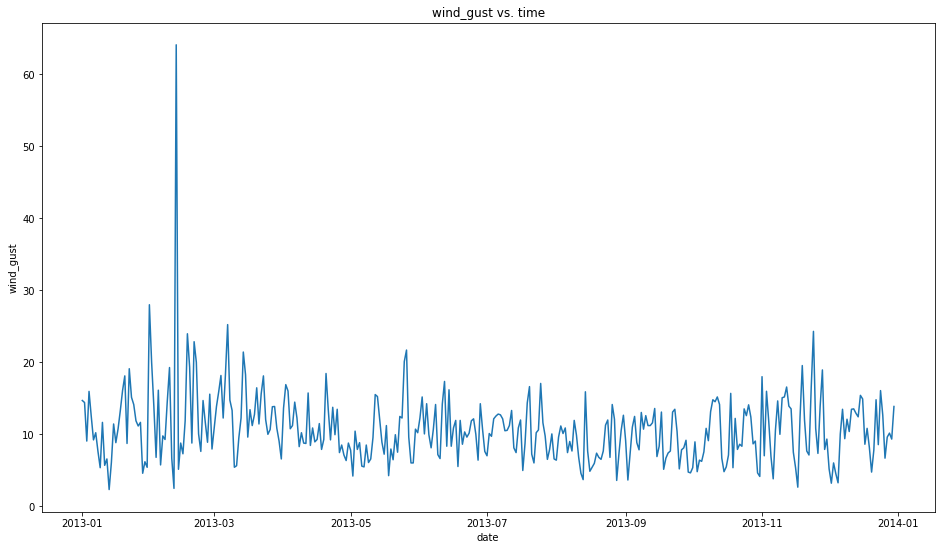

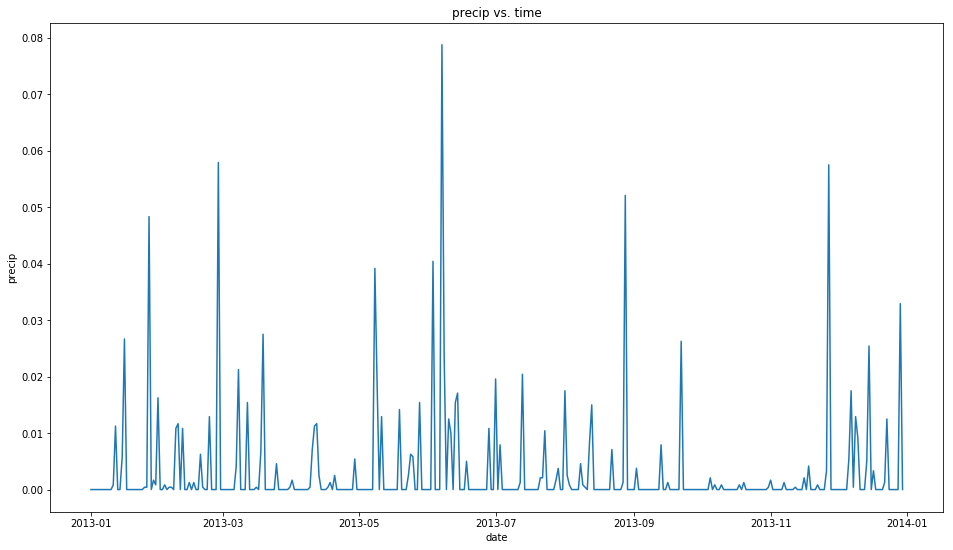

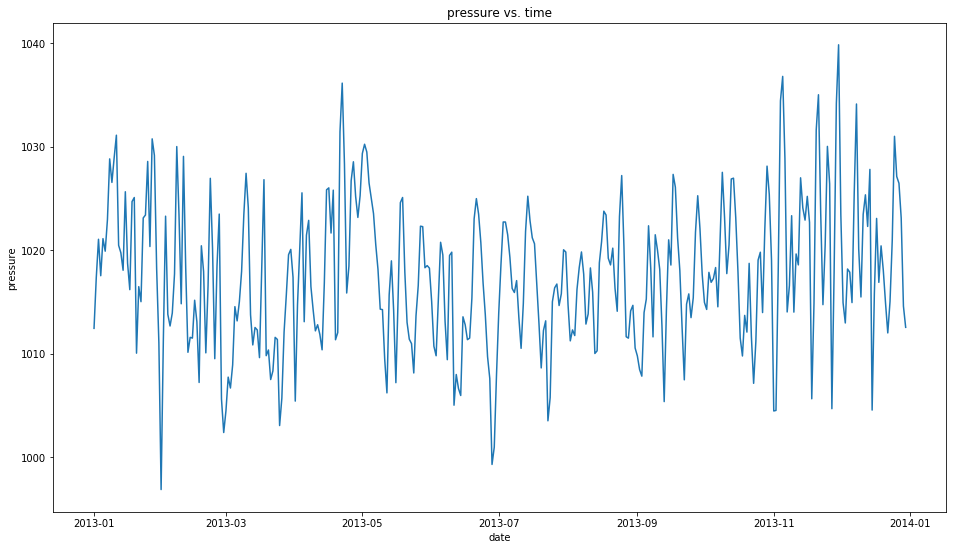

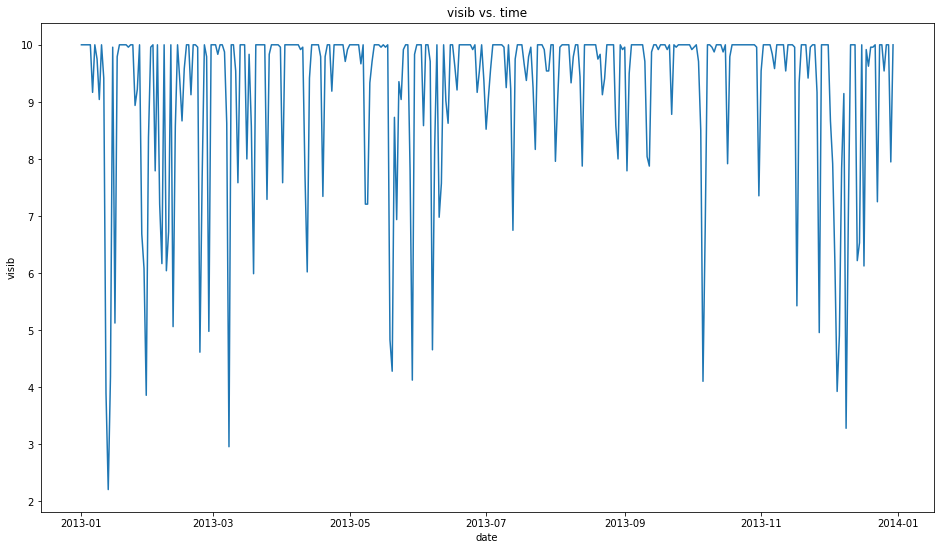

[None, None, None, None, None, None, None, None, None, None]

In [315]:
# here are the weather conditions we're interested in, with dep_delay as
# index[0] so we can compare it with the other entries in the list

weather = ['dep_delay','temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib']

# theoretically any of these features could influece delays
# since we don't really have much to go off of, let's just plot them all!

[ plotFunction(pivotTable(flight_weather, i, 'date'),
               'date', i, str(i)+" vs. time") for i in weather ]

When plotting all of the different weather features, it's not immediately apparent which would influence departure delays. It seems precipitation and visibility could be factors though. We can check this by calculating a correlation matrix.

In [316]:
#### np.corrcoef(flight_weather['dep_delay'], flight_weather['precip'])

# if you run the code above, you get all kinds of errors in the matrix of
# probabilities. that's because numpy doesn't handle NAs well.
# rather than compute the correlation matrix for each column
# there's two routes we can go--either dropping NAs from the df
# or using the built-in pandas one with a more sparse df
#
# let's do pandas-style

df_sparse = flight_weather[[i for i in weather]]
df_sparse.corr()

,dep_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
dep_delay,1.000000,0.058980,0.098020,0.106202,-0.041077,-0.002850,-0.002850,0.044321,-0.071745,-0.089652
temp,0.058980,1.000000,0.890772,0.035558,-0.063539,-0.052942,-0.052942,-0.011939,-0.260329,0.098718
dewp,0.098020,0.890772,1.000000,0.477514,-0.206649,-0.114863,-0.114863,0.065101,-0.300169,-0.111401
humid,0.106202,0.035558,0.477514,1.000000,-0.346154,-0.151787,-0.151787,0.194196,-0.178806,-0.516835
wind_dir,-0.041077,-0.063539,-0.206649,-0.346154,1.000000,0.190446,0.190446,-0.084915,-0.201363,0.253382
wind_speed,-0.002850,-0.052942,-0.114863,-0.151787,0.190446,1.000000,1.000000,0.007008,-0.104701,0.052587
wind_gust,-0.002850,-0.052942,-0.114863,-0.151787,0.190446,1.000000,1.000000,0.007008,-0.104701,0.052587
precip,0.044321,-0.011939,0.065101,0.194196,-0.084915,0.007008,0.007008,1.000000,-0.087032,-0.319531
pressure,-0.071745,-0.260329,-0.300169,-0.178806,-0.201363,-0.104701,-0.104701,-0.087032,1.000000,0.106528
visib,-0.089652,0.098718,-0.111401,-0.516835,0.253382,0.052587,0.052587,-0.319531,0.106528,1.000000


To interpret the correlation matrix, there appears to be a series of minor correlations between dewpoint, humidity, air pressure, and visibiilty and departure delay. The former two are positive correlations and the latter two are negative correlations. Everything else is insignificant. It could be argued that the correlations are spurious, but hey, what do I know... not a meteorologist.

To develop some kind of narrative behind all of the different variables, perhaps dewpoint or humidity cause more mechanical problems for aircraft. Similarly, perhaps air pressure and visibility cause pilots to make different decisions in the air and thus cause departure delay to move in opposition to the two of these factors. 

Hope that clears things up :)